# 7-3. 선형회기(Linear Regression)
딥 러닝을 이해하기 위해서는 선형 회귀(Linear Regression)와 로지스틱 회귀(Logsitic Regression)를 이해할 필요가 있습니다. 이번 챕터에서는 머신 러닝에서 쓰이는 용어인 가설(Hypothesis), 손실 함수(Loss Function) 그리고 경사 하강법(Gradient Descent)에 대한 개념과 선형 회귀에 대해서 이해합니다.

### 1. 선형 회귀(Linear Regression)
시험 공부하는 시간을 늘리면 늘릴 수록 성적이 잘 나옵니다. 하루에 걷는 횟수를 늘릴 수록, 몸무게는 줄어듭니다. 집의 평수가 클수록, 집의 매매 가격은 비싼 경향이 있습니다. 이는 수학적으로 생각해보면 어떤 요인의 수치에 따라서 특정 요인의 수치가 영향을 받고있다고 말할 수 있습니다. 조금 더 수학적인 표현을 써보면 어떤 변수의 값에 따라서 특정 변수의 값이 영향을 받고 있다고 볼 수 있습니다. 다른 변수의 값을 변하게하는 변수를 x, 변수 x에 의해서 값이 종속적으로 변하는 변수 y라고 해봅시다.

이때 변수 x의 값은 독립적으로 변할 수 있는 것에 반해, y값은 계속해서 x의 값에 의해서, 종속적으로 결정되므로 x를 독립 변수, y를 종속 변수라고도 합니다. 선형 회귀는 한 개 이상의 독립 변수 x와 y의 선형 관계를 모델링합니다. 만약, 독립 변수 x가 1개라면 단순 선형 회귀라고 합니다.

##### 1) 단순 선형 회귀 분석(Simple Linear Regression Analysis)
y=$W_{x}+b$  
위의 수식은 단순 선형 회귀의 수식을 보여줍니다. 여기서 독립 변수 x와 곱해지는 값 W를 머신 러닝에서는 가중치(weight), 별도로 더해지는 값 b를 편향(bias)이라고 합니다. 직선의 방정식에서는 각각 직선의 기울기와 절편을 의미합니다. W와 b가 없이 y와 x란 수식은 y는 x와 같다는 하나의 식밖에 표현하지 못합니다. 그래프 상으로 말하면, 하나의 직선밖에 표현하지 못합니다.

y=x  

다시 말해 W와 b의 값을 적절히 찾아내면 x와 y의 관계를 적절히 모델링한 것이 됩니다.

##### 2) 다중 선형 회귀 분석(Multiple Linear Regression Analysis)
y=$ W_{1}x_{1}+ W_{2}x_{2} +...W_{n}x_{n}+b  $  
잘 생각해보니까 집의 매매 가격은 단순히 집의 평수가 크다고 결정되는 게 아니라 집의 층의 수, 방의 개수, 지하철 역과의 거리와도 영향이 있는 것 같습니다. 이제 이러한 다수의 요소를 가지고 집의 매매 가격을 예측해보고 싶습니다. y는 여전히 1개이지만 이제 x는 1개가 아니라 여러 개가 되었습니다. 이제 이를 다중 선형 회귀 분석이라고 합니다. 이에 대한 실습은 뒤의 챕터에서 진행합니다.

### 2. 가설(Hypothesis) 세우기
단순 선형 회귀를 가지고 문제를 풀어봅시다. 어떤 학생의 공부 시간에 따라서 다음과 같은 점수를 얻었다는 데이터가 있습니다.

| hours(x) | scroe(y)
| ---: | ---:
|2|25
|3|50
|4|42
|5|61

알고있는 데이터로부터 x와 y의 관계를 유추하고, 이 학생이 6시간, 7시간, 8시간을 공부하였을 때의 성적을 예측해보고 싶습니다. x와 y의 관계를 유추하기 위해서 수학적으로 식을 세워보게 되는데 머신 러닝에서는 이러한 식을 **가설(Hypothesis)**이라고 합니다. 아래의 H(x)에서 H는 Hypothesis를 의미합니다. 사실 선형 회귀의 가설은 이미 아래와 같이 널리 알려져있습니다.

H(x) = $W_{x} + b$

**그래프**


위의 그림은 W와 b의 값에 따라서 천차만별로 그려지는 직선의 모습을 보여줍니다. 중학교 수학 과정인 직선의 방정식을 알고있다면, 위의 가설에서 W는 직선의 기울기이고 b는 절편으로 직선을 표현함을 알 수 있습니다. 결국 선형 회귀는 주어진 데이터로부터 y와 x의 관계를 가장 잘 나타내는 직선을 그리는 일을 말합니다. 그리고 어떤 직선인지 결정하는 것은 W와 b의 값이므로 선형 회귀에서 해야할 일은 결국 적절한 W와 b를 찾아내는 일이 됩니다.

아직은 방법을 모르지만, 어떤 방법을 사용하여 적절한 W와 b의 값을 찾은 덕택에 y와 x의 관계를 가장 잘 나타내는 직선을 위의 좌표 평면 상에서 그렸다고 한 번 가정해보겠습니다. 이 직선을 x가 6일때, 7일때, 8일때에 대해서도 계속해서 직선을 그저 이어그린다면 이 학생이 6시간을 공부했을 때, 7시간을 공부했을 때, 8시간을 공부했을 때의 예상 점수를 말할 수 있게 됩니다. 왜냐면 x가 각각 6일 때, 7일 때, 8일 때의 y값을 확인하면 되기 때문입니다.

...................

### 3. 비용 함수(Cost function) : 평균 제곱 오차(MSE)
앞서 주어진 데이터에서 x와 y의 관계를 W와 b를 이용하여 식을 세우는 일을 가설이라고 언급했습니다. 그리고 이제 해야할 일은 문제에 대한 규칙을 가장 잘 표현하는 W와 b를 찾는 일입니다. 머신 러닝은 W와 b를 찾기 위해서 실제값과 가설로부터 얻은 예측값의 오차를 계산하는 식을 세우고, 이 식의 값을 최소화하는 최적의 W와 b를 찾아냅니다.

이 때 실제값과 예측값에 대한 오차에 대한 식을 **목적 함수(Objective function) 또는 비용 함수(Cost function) 또는 손실 함수(Loss function)**라고 합니다. 함수의 값을 최소화하거나, 최대화하거나 하는 목적을 가진 함수를 목적 함수(Objective function)라고 합니다. 그리고 값을 최소화하려고 하면 이를 비용 함수(Cost function) 또는 손실 함수(Loss function)라고 합니다. 이 책에서는 목적 함수, 비용 함수, 손실 함수란 용어를 같은 의미로 혼용해서 사용합니다.

비용 함수는 단순히 실제값과 예측값에 대한 오차를 표현하면 되는 것이 아니라, 예측값의 오차를 줄이는 일에 최적화 된 식이어야 합니다. 앞으로 배울 러닝, 딥 러닝에는 다양한 문제들이 있고, 각 문제들에는 적합한 비용 함수들이 있습니다. **회귀 문제의 경우에는 주로 평균 제곱 오차(Mean Squered Error, MSE)**가 사용됩니다  
.....  
**그래프**  
.....  


### 4. 옵티마이저(Optimizer) : 경사하강법(Gradient Descent)
선형 회귀를 포함한 수많은 머신 러닝, 딥 러닝의 학습은 **결국 비용 함수를 최소화하는 매개 변수인 W와 b을 찾기 위한 작업을 수행합니다. 이때 사용되는 알고리즘을 옵티마이저(Optimizer) 또는 최적화 알고리즘**이라고 부릅니다.


그리고 이 옵티마이저를 통해 **적절한 W와 b를 찾아내는 과정을 머신 러닝에서 학습(training)**이라고 부릅니다. 여기서는 가장 기본적인 옵티마이저 알고리즘인 **경사 하강법(Gradient Descent)**에 대해서 배웁니다.

경사 하강법을 이해하기 위해서 cost와 기울기 W와의 관계를 이해해보겠습니다. W는 머신 러닝 용어로는 가중치라고 불리지만, 직선의 방정식 관점에서 보면 직선의 기울기를 의미하고 있습니다. 아래의 그래프는 기울기 W가 지나치게 높거나, 낮을 때 어떻게 오차가 커지는 보여줍니다.
,...

### 5. 케라스로 구현하는 선형 회귀
케라스에 대해서는 뒤의 딥 러닝 챕터에서 더 자세히 배우겠지만, 우선 간단하게 케라스를 이용해서 선형 회귀를 구현해보도록 하겠습니다. 우선 케라스로 모델을 만드는 기본적인 형식은 다음과 같습니다. 아래의 코드는 아직 완전한 코드가 아니므로 실행이 불가합니다.

In [8]:
'''
model = keras.models.Sequential()
model.add(keras.layers.Dense(1,input_dim=1))
'''

'\nmodel = keras.models.Sequential()\nmodel.add(keras.layers.Dense(1,input_dim=1))\n'

Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 필요한 사항들을 추가해갑니다. 첫번째 인자인 1은 출력의 차원을 의미하며, 두번째 인자인 input_dim은 입력의 차원을 정의하는데 이번 실습과 같이 1개의 실수 x를 가지고 하는 1개의 실수 y를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값을 가집니다. 이제 직접 실습을 진행해보겠습니다.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import numpy as np

x=np.array([1,2,3,4,5,6,7,8,9]) # 공부하는 시간
y=np.array([11,22,33,44,53,66,77,87,95]) # 각 공부하는 시간에 맵핑되는 성적

In [9]:
# Create Model 
model = Sequential()

# Ouput Demension : 1 , Input Demension: 1 
model.add(Dense(1, input_dim=1, activation='linear'))

# Learning Rate = 0.01
# sgd: Gradient Descent
sgd = optimizers.SGD(lr=0.01)

# Loss Function: mse(Mean Sequared Error)
model.compile(optimizer=sgd, loss='mse',metrics=['mse'])

model.fit(x,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 10ms/sample - loss: 283.7624 - mse: 283.7624
Epoch 2/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1097 - mse: 2.1097
Epoch 3/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1109 - mse: 2.1109
Epoch 4/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1120 - mse: 2.1120
Epoch 5/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1131 - mse: 2.1131
Epoch 6/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1141 - mse: 2.1141
Epoch 7/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1152 - mse: 2.1152
Epoch 8/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1161 - mse: 2.1161
Epoch 9/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1171 - mse: 2.1171
Epoch 10/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1180 - mse: 2.1180
Epoch 11/300
9/9 [==============================] - 0s

9/9 [==============================] - 0s 2ms/sample - loss: 2.1438 - mse: 2.1438
Epoch 87/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1438 - mse: 2.1438
Epoch 88/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1439 - mse: 2.1439
Epoch 89/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1440 - mse: 2.1440
Epoch 90/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1440 - mse: 2.1440
Epoch 91/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1441 - mse: 2.1441
Epoch 92/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1442 - mse: 2.1442
Epoch 93/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1442 - mse: 2.1442
Epoch 94/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1443 - mse: 2.1443
Epoch 95/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1443 - mse: 2.1443
Epoch 96/300
9/9 [==============================] - 0s 3ms/samp

9/9 [==============================] - 0s 3ms/sample - loss: 2.1459 - mse: 2.1459
Epoch 172/300
9/9 [==============================] - 0s 4ms/sample - loss: 2.1459 - mse: 2.1459
Epoch 173/300
9/9 [==============================] - 0s 7ms/sample - loss: 2.1459 - mse: 2.1459
Epoch 174/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1459 - mse: 2.1459
Epoch 175/300
9/9 [==============================] - 0s 8ms/sample - loss: 2.1459 - mse: 2.1459
Epoch 176/300
9/9 [==============================] - 0s 4ms/sample - loss: 2.1459 - mse: 2.1459
Epoch 177/300
9/9 [==============================] - 0s 5ms/sample - loss: 2.1459 - mse: 2.1459
Epoch 178/300
9/9 [==============================] - 0s 4ms/sample - loss: 2.1459 - mse: 2.1459
Epoch 179/300
9/9 [==============================] - 0s 4ms/sample - loss: 2.1459 - mse: 2.1459
Epoch 180/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1459 - mse: 2.1459
Epoch 181/300
9/9 [==============================] - 0

9/9 [==============================] - 0s 2ms/sample - loss: 2.1460 - mse: 2.1460
Epoch 257/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1460 - mse: 2.1460
Epoch 258/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1460 - mse: 2.1460
Epoch 259/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1460 - mse: 2.1460
Epoch 260/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1460 - mse: 2.1460
Epoch 261/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1460 - mse: 2.1460
Epoch 262/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1460 - mse: 2.1460
Epoch 263/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1460 - mse: 2.1460
Epoch 264/300
9/9 [==============================] - 0s 2ms/sample - loss: 2.1460 - mse: 2.1460
Epoch 265/300
9/9 [==============================] - 0s 3ms/sample - loss: 2.1460 - mse: 2.1460
Epoch 266/300
9/9 [==============================] - 0

위의 코드는 간단하지만, 지금까지 배운 것들이 집대성 된 코드입니다. 

- 우선 공부한 시간을 x, 
- 각 공부한 시간에 따른 성적을 y라고 해봅시다. 
- activation은 어떤 함수를 사용할 것인지를 의미하는데 선형 회귀를 사용할 경우에는 linear라고 기재합니다.
- 옵티마이저로는 경사 하강법의 일종인 확률적 경사 하강법을 사용하였으며, 
- 학습률은 0.01로 정하였습니다. 
- 손실 함수로는 평균 제곱 오차를 사용합니다. 
- 그리고 전체 데이터에 대한 훈련 횟수는 300으로 합니다.

전체 데이터에 대한 훈련 횟수는 300으로 하였지만, 어느 순간 오차가 더 이상 줄어들지 않는데 이는 오차를 최소화하는 가중치 W와 b를 찾았기 때문으로 추정이 가능합니다. 이제 최종적으로 선택된 오차를 최소화하는 직선을 그래프로 그려보겠습니다.

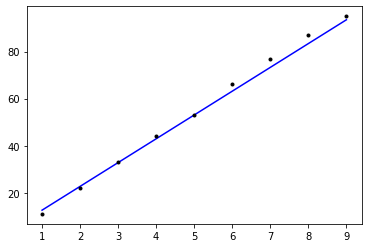

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

위의 그래프에서 각 점은 우리가 실제 주었던 실제값에 해당되며, 직선은 실제값으로부터 오차를 최소화하는 W와 b의 값을 가지는 직선입니다. 이제 이 직선을 통해 9시간 30분을 공부하였을 때의 시험 성적을 예측하게 해봅시다. model.predict()은 학습이 완료된 모델이 입력된 데이터에 대해서 어떤 값을 예측하는지를 보여줍니다.

In [7]:
print(model.predict([9.5]))

[[98.55646]]


9시간 30분을 공부하면 약 98.5점을 얻는다고 예측하고 있습니다.